In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,NaN,0.00,0.0
2,NaN,13.53,3.55,NaN,72.99,0.39,7.78,0.00,0.0
3,NaN,13.21,3.69,NaN,72.61,0.57,8.22,NaN,0.0
4,1.51742,13.27,3.62,1.24,73.08,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,NaN,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,NaN,0.00,NaN,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,NaN,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,NaN,NaN,73.61,0.00,NaN,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	20
float64		column 2	60
float64		column 3	40
float64		column 4	50
float64		column 5	63
float64		column 6	33
float64		column 7	43
float64		column 8	43
float64		column 9	20


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,194.000000,154.000000,174.000000,164.000000,151.000000,181.000000,171.000000,171.000000,194.000000
mean,1.518394,13.330974,2.764023,1.461646,72.728609,0.505359,8.950526,0.159591,0.055567
std,0.003043,0.664846,1.381903,0.494758,0.623090,0.679787,1.305439,0.463641,0.094660
min,1.511150,11.020000,0.000000,0.340000,69.890000,0.000000,5.430000,0.000000,0.000000
25%,1.516605,12.982500,2.395000,1.190000,72.465000,0.160000,8.240000,0.000000,0.000000
50%,1.517755,13.270000,3.480000,1.380000,72.810000,0.560000,8.610000,0.000000,0.000000
75%,1.519175,13.680000,3.607500,1.612500,73.060000,0.610000,9.205000,0.000000,0.097500
max,1.533930,15.150000,4.490000,3.500000,75.180000,6.210000,14.680000,3.150000,0.510000


<AxesSubplot:>

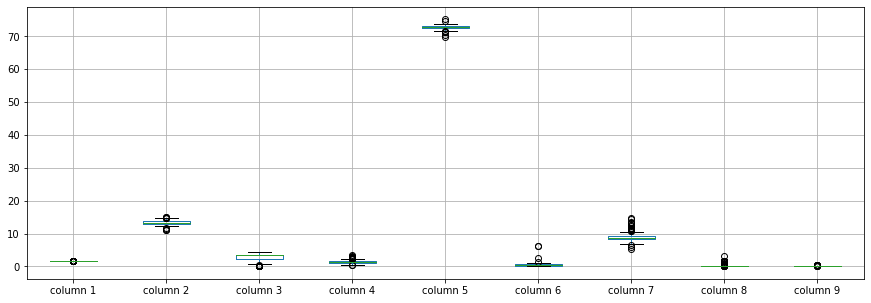

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518394
column 2    13.330974
column 3     2.764023
column 4     1.461646
column 5    72.728609
column 6     0.505359
column 7     8.950526
column 8     0.159591
column 9     0.055567
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.163658,-0.017350,-0.379305,-0.515361,-0.277539,0.779054,0.067576,0.052743
column 2,-0.163658,1.000000,-0.164850,0.299804,-0.326286,-0.234538,-0.156024,0.488703,-0.248074
column 3,-0.017350,-0.164850,1.000000,-0.500589,-0.203156,0.090855,-0.400403,-0.513231,0.041775
column 4,-0.379305,0.299804,-0.500589,1.000000,-0.005833,0.376605,-0.131808,0.456297,-0.044592
column 5,-0.515361,-0.326286,-0.203156,-0.005833,1.000000,0.237922,-0.259061,0.079292,0.017519
column 6,-0.277539,-0.234538,0.090855,0.376605,0.237922,1.000000,-0.301826,-0.173483,-0.013855
column 7,0.779054,-0.156024,-0.400403,-0.131808,-0.259061,-0.301826,1.000000,0.032165,0.063169
column 8,0.067576,0.488703,-0.513231,0.456297,0.079292,-0.173483,0.032165,1.000000,-0.131235
column 9,0.052743,-0.248074,0.041775,-0.044592,0.017519,-0.013855,0.063169,-0.131235,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+88,9+88+88,9+88+88+88,9+88+88+88+88,9+88+88+88+88+88,9+88+88+88+88,9+88+88+88,9+88+88,9+88,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 74.56448716383714
Epoch: 1 , loss: 74.29863915076622
Epoch: 2 , loss: 73.87876774714543
Epoch: 3 , loss: 74.29232993492714
Epoch: 4 , loss: 73.76807814378004
Epoch: 5 , loss: 73.54597590519832
Epoch: 6 , loss: 74.21681184035081
Epoch: 7 , loss: 73.53176879882812
Epoch: 8 , loss: 73.55727445162259
Epoch: 9 , loss: 74.93815700824445
Epoch: 10 , loss: 74.38472248957707
Epoch: 11 , loss: 73.22236427894005
Epoch: 12 , loss: 74.48047021719125
Epoch: 13 , loss: 73.83409294715294
Epoch: 14 , loss: 73.88252346332257
Epoch: 15 , loss: 72.8666625389686
Epoch: 16 , loss: 72.88451737623949
Epoch: 17 , loss: 71.98054709801308
Epoch: 18 , loss: 71.63662895789513
Epoch: 19 , loss: 71.81978137676532
Epoch: 20 , loss: 71.7463745704064
Epoch: 21 , loss: 70.47545741154597
Epoch: 22 , loss: 70.49186295729417
Epoch: 23 , loss: 69.11000559880183
Epoch: 24 , loss: 68.05950458233173
Epoch: 25 , loss: 67.54632480327899
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2     8.621523
column 3     3.750000
column 4     0.986712
column 5    29.793072
column 6     0.030000
column 7     9.000000
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.305071,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.340636,0.000000,0.0
2,0.725003,0.000000,0.000000,0.929820,0.0,0.000000,0.000000,0.000000,0.0
3,1.592182,0.000000,0.000000,2.400528,0.0,0.000000,0.000000,0.266390,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,-0.092387,0.897838,0.214754,0.0
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.000000,1.246064,0.000000,0.0,0.000000,0.000000,0.000000,0.0
210,0.000000,-4.474144,0.000000,-0.531141,0.0,0.000000,0.000000,0.000000,0.0
211,0.000000,0.000000,0.000000,-0.634147,0.0,0.000000,0.000000,0.000000,0.0
212,0.000000,0.000000,0.701826,-1.586375,0.0,0.000000,-6.979051,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(254.68602784867093, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.23356348483430997

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     0.870000
column 5    72.220000
column 6     0.190000
column 7     9.850000
column 8     0.108461
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.640000,4.490000,1.100000,71.78,0.060000,8.750000,0.305071,0.0
1,1.517610,13.890000,3.600000,1.360000,72.73,0.480000,5.489364,0.000000,0.0
2,2.241183,13.530000,3.550000,2.469820,72.99,0.390000,7.780000,0.000000,0.0
3,3.109842,13.210000,3.690000,3.690528,72.61,0.570000,8.220000,0.266390,0.0
4,1.517420,13.270000,3.620000,1.240000,73.08,0.457613,8.967838,0.214754,0.0
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,1.246064,2.880000,72.61,0.080000,9.180000,1.060000,0.0
210,1.516850,10.445856,0.000000,1.458859,73.06,0.000000,8.400000,1.590000,0.0
211,1.520650,14.360000,0.000000,1.385853,73.42,0.000000,8.440000,1.640000,0.0
212,1.516510,14.380000,0.701826,0.353625,73.61,0.000000,1.500949,1.570000,0.0


In [20]:
imputations[-1].to_excel("Glass_NW_20(imp).xlsx", index=False, header=False)